In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import Callback
from tensorflow.keras import layers
import tensorflow_probability as tfp

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

podaci = pd.read_csv('winequality-red.csv')

In [ ]:
# tf 2.10 i tfp 0.18

print("TensorFlow version:", tf.__version__)
print("TensorFlow Probability version:", tfp.__version__)

In [ ]:
# Prikaz osnovnih statističkih podataka
print("\nOsnovne statistike:\n")
print(podaci.describe())


Osnovne statistike:

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000        

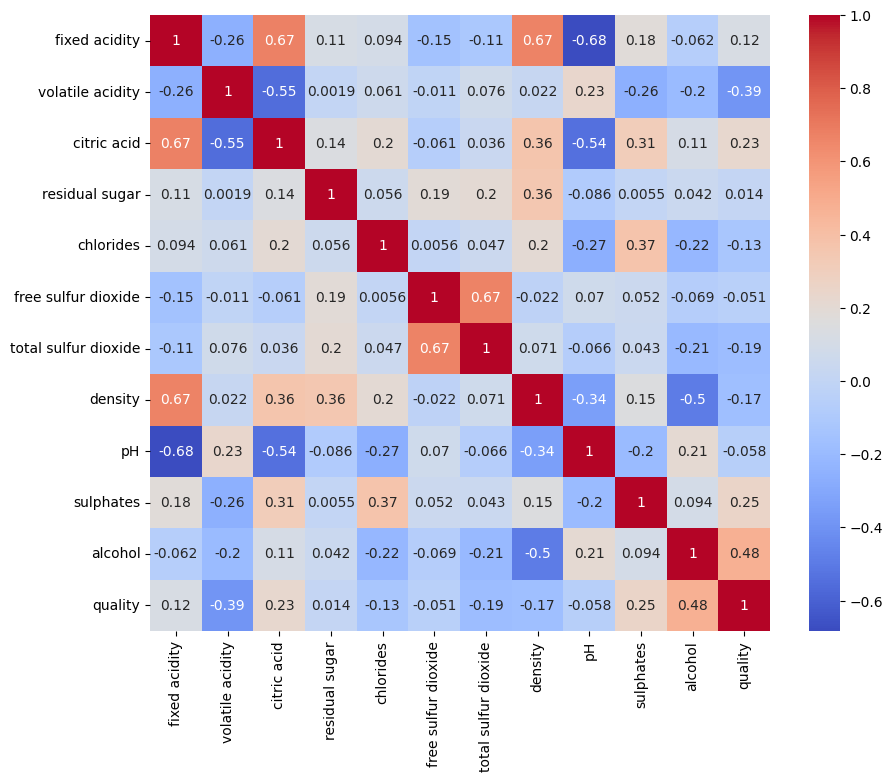

In [ ]:
# Vizualizacije za EDA
# Korelacijska matrica
plt.figure(figsize=(10, 8))
sns.heatmap(podaci.corr(), annot=True, cmap="coolwarm")
plt.show()

<ipython-input-8-1fe0ac635537>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='quality', data=podaci, palette="viridis")


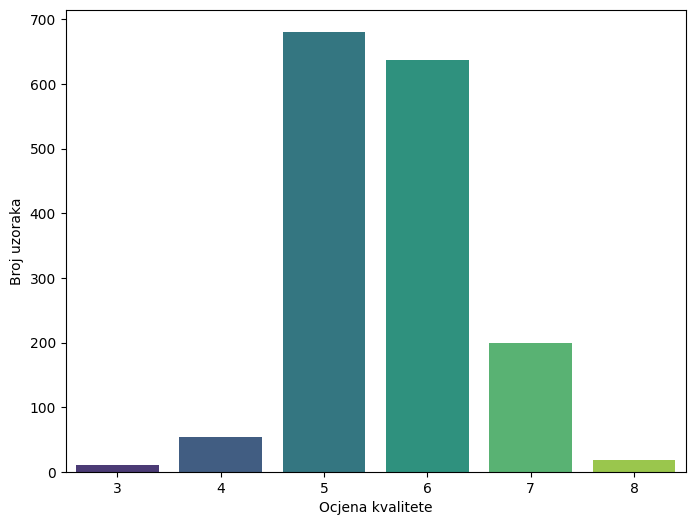

In [ ]:
# Distribucija ocjena kvalitete
plt.figure(figsize=(8, 6))
sns.countplot(x='quality', data=podaci, palette="viridis")
plt.xlabel("Ocjena kvalitete")
plt.ylabel("Broj uzoraka")
plt.show()

In [ ]:
data = podaci
X = data.drop(columns=['quality']).values
y = data['quality'].values

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

class LossHistory(Callback):
    def on_train_begin(self, logs={}):
        self.train_loss = []
        self.val_loss = []

    def on_epoch_end(self, epoch, logs={}):
        self.train_loss.append(logs.get('loss'))
        self.val_loss.append(logs.get('val_loss'))

def train_and_evaluate_model(model, X_train, y_train, X_val, y_val, epochs=100, batch_size=32):
    history = LossHistory()
    start_time = time.time()
    model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=epochs, batch_size=batch_size, verbose=0, callbacks=[history])
    end_time = time.time()
    return model, history, end_time - start_time

Epoch 1 completed in 0.48 seconds
Epoch 2 completed in 0.07 seconds
Epoch 3 completed in 0.07 seconds
Epoch 4 completed in 0.07 seconds
Epoch 5 completed in 0.07 seconds
Epoch 6 completed in 0.07 seconds
Epoch 7 completed in 0.07 seconds
Epoch 8 completed in 0.07 seconds
Epoch 9 completed in 0.07 seconds
Epoch 10 completed in 0.07 seconds
Epoch 11 completed in 0.07 seconds
Epoch 12 completed in 0.07 seconds
Epoch 13 completed in 0.07 seconds
Epoch 14 completed in 0.07 seconds
Epoch 15 completed in 0.07 seconds
Epoch 16 completed in 0.07 seconds
Epoch 17 completed in 0.07 seconds
Epoch 18 completed in 0.07 seconds
Epoch 19 completed in 0.07 seconds
Epoch 20 completed in 0.07 seconds
Epoch 21 completed in 0.07 seconds
Epoch 22 completed in 0.07 seconds
Epoch 23 completed in 0.07 seconds
Epoch 24 completed in 0.07 seconds
Epoch 25 completed in 0.07 seconds
Epoch 26 completed in 0.07 seconds
Epoch 27 completed in 0.07 seconds
Epoch 28 completed in 0.07 seconds
Epoch 29 completed in 0.07 se

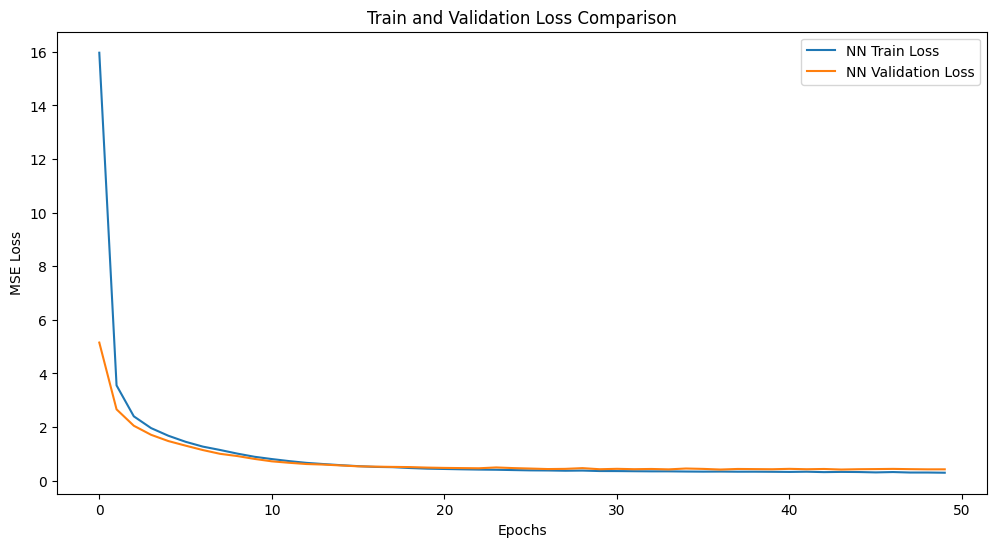

In [ ]:
# ANN
def create_nn(input_dim):
    model = Sequential([
        Dense(64, activation='relu', input_dim=input_dim),
        Dense(64, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer=Adam(), loss='mse')
    return model

nn = create_nn(X_train.shape[1])
nn, nn_history, nn_time = train_and_evaluate_model(nn, X_train, y_train, X_val, y_val)

nn_test_mse = mean_squared_error(y_test, nn.predict(X_test))
print(f"Normal NN - Time: {nn_time:.2f}s, Test MSE: {nn_test_mse:.4f}")

print("Train Loss (Last 10 Epochs):", nn_history.train_loss[-10:])
print("Validation Loss (Last 10 Epochs):", nn_history.val_loss[-10:])

plt.figure(figsize=(12, 6))
plt.plot(nn_history.train_loss, label='NN Train Loss')
plt.plot(nn_history.val_loss, label='NN Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.title('Train and Validation Loss Comparison')
plt.legend()
plt.show()

Compare MSE for test for ANN and BNN